In [163]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scipy.io
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import classification_report
import geopandas as gpd
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [164]:

# Load Excel file into a DataFrame
df = pd.read_csv('Data_from_2018_to_2022.csv')

# Display basic information about the dataset
print("Dataset Shape:", df.shape)
print("Column Names:", df.columns)
print(df.head(5))

Dataset Shape: (136, 20)
Column Names: Index(['FID', 'dname2019', 'd', 'total2020', 'ttotal2020', '2010', '2016',
       '2017', '2018', '2020', 'X_Coord', 'Y_Coord', 'Shape_Area', 'PDensity',
       'AV_Inc_Rate', 'Inc_Rate', 'AV_Tmax', 'AV_Tmin', 'AV_Rfall', 'AV_Popn'],
      dtype='object')
   FID dname2019         d total2020  ttotal2020      2010      2016  \
0    0    MASAKA    Masaka   335,700      335700    MASAKA    MASAKA   
1    1    BUTEBO    Butebo   121,200      121200   PALLISA    BUTEBO   
2    2  ALEBTONG  Alebtong   266,100      266100  ALEBTONG  ALEBTONG   
3    3    TORORO    Tororo   597,500      597500    TORORO    TORORO   
4    4    MOROTO    Moroto   118,500      118500    MOROTO    MOROTO   

       2017      2018      2020    X_Coord   Y_Coord   Shape_Area    PDensity  \
0    MASAKA    MASAKA    MASAKA  31.855583 -0.491258  2197.374846  154.310449   
1    BUTEBO    BUTEBO    BUTEBO  33.984289  1.182228   237.810756  749.401555   
2  ALEBTONG  ALEBTONG  ALEBTO

In [165]:
# number of rows and columns
number_of_columns = df.shape[1]
number_of_rows = df.shape[0]
print(f'Number of columns: {number_of_columns}')
print(f'Number of rows: {number_of_rows}')

Number of columns: 20
Number of rows: 136


In [166]:
# Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   FID          136 non-null    int64  
 1   dname2019    136 non-null    object 
 2   d            136 non-null    object 
 3   total2020    136 non-null    object 
 4   ttotal2020   136 non-null    int64  
 5   2010         136 non-null    object 
 6   2016         136 non-null    object 
 7   2017         136 non-null    object 
 8   2018         136 non-null    object 
 9   2020         136 non-null    object 
 10  X_Coord      136 non-null    float64
 11  Y_Coord      136 non-null    float64
 12  Shape_Area   136 non-null    float64
 13  PDensity     136 non-null    float64
 14  AV_Inc_Rate  136 non-null    float64
 15  Inc_Rate     136 non-null    float64
 16  AV_Tmax      136 non-null    float64
 17  AV_Tmin      136 non-null    float64
 18  AV_Rfall     136 non-null    float64
 19  AV_Popn 

In [167]:
#Checking for duplicate values
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
131    False
132    False
133    False
134    False
135    False
Length: 136, dtype: bool

In [168]:
#Checking for number of duplicate values
num_duplicates = df.duplicated().sum()
print(num_duplicates)

0


In [169]:
# Check for missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)


Missing Values:
 FID            0
dname2019      0
d              0
total2020      0
ttotal2020     0
2010           0
2016           0
2017           0
2018           0
2020           0
X_Coord        0
Y_Coord        0
Shape_Area     0
PDensity       0
AV_Inc_Rate    0
Inc_Rate       0
AV_Tmax        0
AV_Tmin        0
AV_Rfall       0
AV_Popn        0
dtype: int64


In [170]:
# Identify columns containing categorical variables (district names)
categorical_columns = ['dname2019', 'd']

# Apply Label Encoding to convert categorical variables to numerical labels
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


# Display the modified DataFrame with encoded categorical variables
print("\nDataFrame after Label Encoding:")
print(df.head())

# Save the preprocessed DataFrame to a new CSV file
df.to_csv('preprocessed_dataset_categorical.csv', index=False)


DataFrame after Label Encoding:
   FID  dname2019    d total2020  ttotal2020      2010      2016      2017  \
0    0         88   88   335,700      335700    MASAKA    MASAKA    MASAKA   
1    1         27   27   121,200      121200   PALLISA    BUTEBO    BUTEBO   
2    2          3    3   266,100      266100  ALEBTONG  ALEBTONG  ALEBTONG   
3    3        131  132   597,500      597500    TORORO    TORORO    TORORO   
4    4         95   95   118,500      118500    MOROTO    MOROTO    MOROTO   

       2018      2020    X_Coord   Y_Coord   Shape_Area    PDensity  \
0    MASAKA    MASAKA  31.855583 -0.491258  2197.374846  154.310449   
1    BUTEBO    BUTEBO  33.984289  1.182228   237.810756  749.401555   
2  ALEBTONG  ALEBTONG  33.255708  2.266684  1554.604156  173.277397   
3    TORORO    TORORO  34.082246  0.724974  1191.189961  507.715424   
4    MOROTO    MOROTO  34.631648  2.648687  3542.469775   33.739407   

   AV_Inc_Rate  Inc_Rate  AV_Tmax  AV_Tmin  AV_Rfall      AV_Popn  
0  

In [171]:
# Load the preprocessed dataset (after label encoding)
df = pd.read_csv('preprocessed_dataset_categorical.csv')

# Display the first few rows of the dataset
print("Preprocessed DataFrame:")
print(df.head())

# List of numerical columns
numerical_columns = ['total2020', 'ttotal2020', 'Shape_Area', 'PDensity', 'AV_Inc_Rate', 'Inc_Rate', 'AV_Tmax', 'AV_Tmin', 'AV_Rfall', 'AV_Popn']

# Remove non-numeric characters (e.g., commas) from numerical columns
df[numerical_columns] = df[numerical_columns].replace('[^\d.]', '', regex=True).astype(float)

# Apply Min-Max Scaling to numerical features
scaler = MinMaxScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the DataFrame after scaling
print("\nDataFrame after Min-Max Scaling:")
print(df.head())

# Save the final preprocessed DataFrame to a new CSV file
df.to_csv('preprocessed_dataset_scaling.csv', index=False)

Preprocessed DataFrame:
   FID  dname2019    d total2020  ttotal2020      2010      2016      2017  \
0    0         88   88   335,700      335700    MASAKA    MASAKA    MASAKA   
1    1         27   27   121,200      121200   PALLISA    BUTEBO    BUTEBO   
2    2          3    3   266,100      266100  ALEBTONG  ALEBTONG  ALEBTONG   
3    3        131  132   597,500      597500    TORORO    TORORO    TORORO   
4    4         95   95   118,500      118500    MOROTO    MOROTO    MOROTO   

       2018      2020    X_Coord   Y_Coord   Shape_Area    PDensity  \
0    MASAKA    MASAKA  31.855583 -0.491258  2197.374846  154.310449   
1    BUTEBO    BUTEBO  33.984289  1.182228   237.810756  749.401555   
2  ALEBTONG  ALEBTONG  33.255708  2.266684  1554.604156  173.277397   
3    TORORO    TORORO  34.082246  0.724974  1191.189961  507.715424   
4    MOROTO    MOROTO  34.631648  2.648687  3542.469775   33.739407   

   AV_Inc_Rate  Inc_Rate  AV_Tmax  AV_Tmin  AV_Rfall      AV_Popn  
0       2014

In [172]:

# Load the preprocessed dataset (after scaling and normalizing)
df = pd.read_csv('preprocessed_dataset_scaling.csv')

# Display the first few rows of the dataset
print("Preprocessed DataFrame:")
print(df.head())

Preprocessed DataFrame:
   FID  dname2019    d  total2020  ttotal2020      2010      2016      2017  \
0    0         88   88   0.099997    0.099997    MASAKA    MASAKA    MASAKA   
1    1         27   27   0.025156    0.025156   PALLISA    BUTEBO    BUTEBO   
2    2          3    3   0.075713    0.075713  ALEBTONG  ALEBTONG  ALEBTONG   
3    3        131  132   0.191340    0.191340    TORORO    TORORO    TORORO   
4    4         95   95   0.024214    0.024214    MOROTO    MOROTO    MOROTO   

       2018      2020    X_Coord   Y_Coord  Shape_Area  PDensity  AV_Inc_Rate  \
0    MASAKA    MASAKA  31.855583 -0.491258    0.212621  0.016867     0.050947   
1    BUTEBO    BUTEBO  33.984289  1.182228    0.004531  0.085239     0.015914   
2  ALEBTONG  ALEBTONG  33.255708  2.266684    0.144364  0.019046     0.000225   
3    TORORO    TORORO  34.082246  0.724974    0.105773  0.057471     0.024079   
4    MOROTO    MOROTO  34.631648  2.648687    0.355460  0.003014     0.015878   

   Inc_Rate   

Decision Tree Classifier Accuracy: 0.8214285714285714
Decision Tree Classifier Evaluation Metrics:
Accuracy: 0.8214
Precision: 0.8393
Recall: 0.8214
F1 Score: 0.8076


c:\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


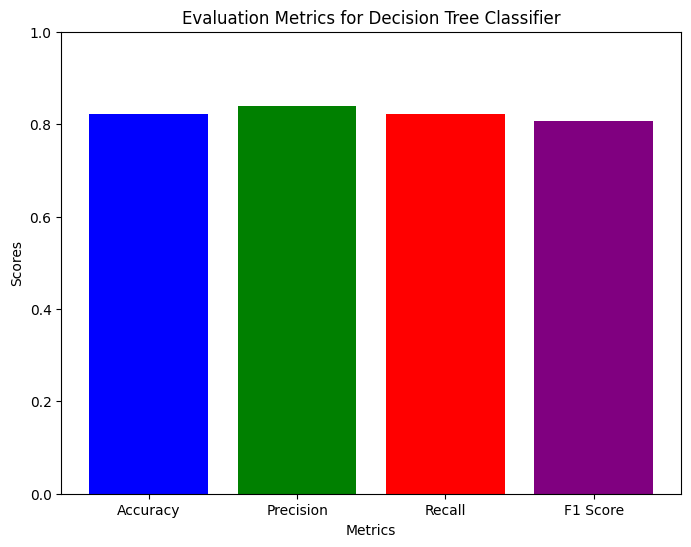

In [173]:
# Load the preprocessed dataset
df = pd.read_csv('preprocessed_dataset_scaling.csv')



# Encode categorical variables
label_encoder = LabelEncoder()
df_encoded = df.apply(label_encoder.fit_transform)

# Define target variable categories
# You may need to adjust these thresholds based on your data distribution
low_density_threshold = df_encoded['PDensity'].quantile(0.33)
high_density_threshold = df_encoded['PDensity'].quantile(0.66)

# Classify districts into high, medium, and low population density regions
df_encoded['Density_Category'] = pd.cut(df_encoded['PDensity'], bins=[0, low_density_threshold, high_density_threshold, float('inf')], labels=['Low', 'Medium', 'High'])

# Split the data into features (X) and target variable (y)
X = df_encoded.drop(columns=['PDensity', 'Density_Category'])  # Features
y = df_encoded['Density_Category']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Encode categorical labels to integers
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
dt_predictions_encoded = label_encoder.transform(dt_predictions)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test_encoded, dt_predictions_encoded)
print("Decision Tree Classifier Accuracy:", dt_accuracy)
#Calculate evaluation metrics
dt_accuracy = accuracy_score(y_test_encoded, dt_predictions_encoded)
dt_precision = precision_score(y_test_encoded, dt_predictions_encoded, average='weighted')
dt_recall = recall_score(y_test_encoded, dt_predictions_encoded, average='weighted')
dt_f1 = f1_score(y_test_encoded, dt_predictions_encoded, average='weighted')

# Print evaluation metrics
print("Decision Tree Classifier Evaluation Metrics:")
print(f"Accuracy: {dt_accuracy:.4f}")
print(f"Precision: {dt_precision:.4f}")
print(f"Recall: {dt_recall:.4f}")
print(f"F1 Score: {dt_f1:.4f}")


# Plotting the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
scores = [dt_accuracy, dt_precision, dt_recall, dt_f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color=['blue', 'green', 'red', 'purple'])
plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Evaluation Metrics for Decision Tree Classifier')
plt.ylim(0, 1)  # Set y-axis limit to range between 0 and 1 for accuracy, precision, recall, and F1-score
plt.show()








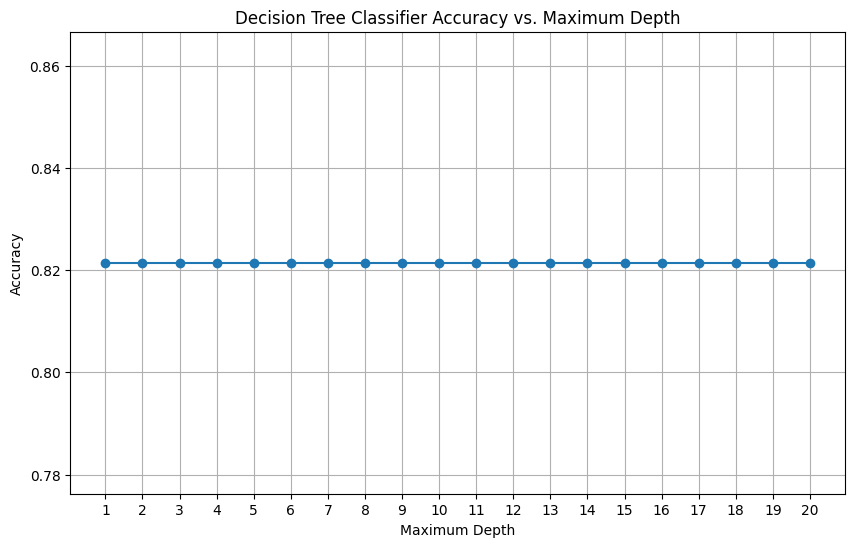

In [174]:
#Plotting the accuracy curve
# Define the range of maximum depths to test
max_depths = np.arange(1, 21)

# Initialize lists to store accuracy scores for different maximum depths
accuracy_scores = []

# Iterate over different maximum depths
for depth in max_depths:
    # Initialize decision tree classifier with the current maximum depth
    dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
    
    # Fit the classifier to the training data
    dt_classifier.fit(X_train, y_train)
    
    # Predict labels for the test data
    dt_predictions = dt_classifier.predict(X_test)
    
    # Calculate accuracy score and append it to the list
    accuracy = accuracy_score(y_test_encoded, dt_predictions_encoded)
    accuracy_scores.append(accuracy)

# Plot the accuracy curve
plt.figure(figsize=(10, 6))
plt.plot(max_depths, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Maximum Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Classifier Accuracy vs. Maximum Depth')
plt.xticks(max_depths)
plt.grid(True)
plt.show()


In [175]:
#REGRESSION
# Define target variable (y) and features (X)
y = df['total2020']
X = df.drop(['FID', 'dname2019', 'd', 'total2020', 'ttotal2020', '2010', '2016', '2017', '2018', '2020'], axis=1)


In [176]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [177]:
# Initialize Linear Regression model
model = LinearRegression()

# Train the model using the training sets
model.fit(X_train, y_train)


LinearRegression()

In [178]:
# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error (MSE): 0.00
R-squared (R2) Score: 0.43


In [179]:
# Example: Predicting new values
new_data = X_test.iloc[[0]]  # Example: taking the first row of test data
predicted_population = model.predict(new_data)

print(f"Predicted Total Population (total2020): {predicted_population[0]:.2f}")


Predicted Total Population (total2020): 0.31


In [180]:
#CLUSTERING
# Select features for clustering
features = ['X_Coord', 'Y_Coord', 'Shape_Area', 'PDensity', 'AV_Inc_Rate', 'Inc_Rate', 'AV_Tmax', 'AV_Tmin', 'AV_Rfall', 'AV_Popn']
X = df[features]


In [181]:
from sklearn.preprocessing import StandardScaler

# Standardize the feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

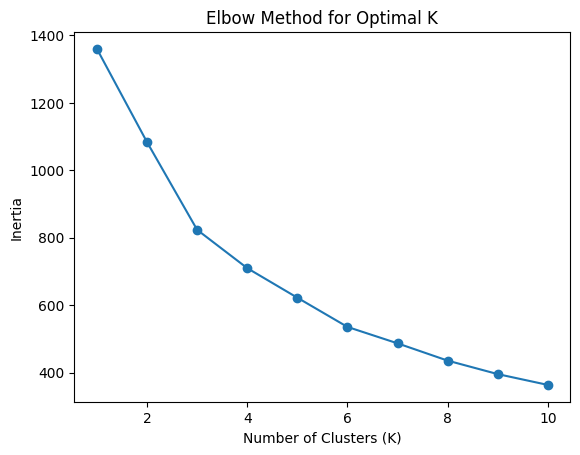

In [182]:
# Elbow method to find the optimal number of clusters (K)
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow curve
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()


In [183]:
# Choose the optimal K based on the Elbow curve (e.g., K=3)
optimal_k = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels back to the DataFrame
df['Cluster'] = clusters


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


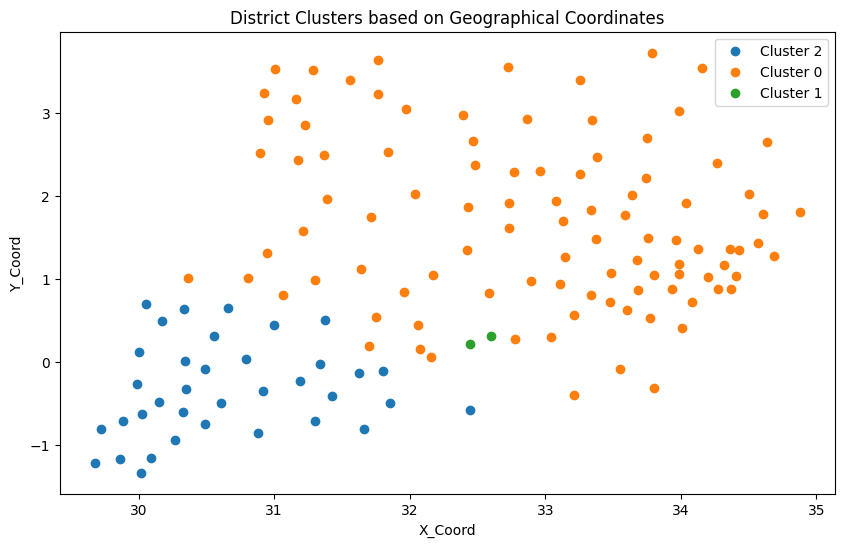

In [184]:
# Visualize clusters based on geographical coordinates
plt.figure(figsize=(10, 6))
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['X_Coord'], cluster_data['Y_Coord'], label=f'Cluster {cluster}')

plt.xlabel('X_Coord')
plt.ylabel('Y_Coord')
plt.title('District Clusters based on Geographical Coordinates')
plt.legend()
plt.show()


In [185]:
#Identifying which districts belong to which cluster by the unique identifier (FID).

# Add the cluster labels to the DataFrame
df['Cluster'] = clusters
# Function to list districts belonging to each cluster
def list_districts_by_cluster(df, clusters):
    districts_in_cluster = df[df['Cluster'] == cluster_label]['dname2019'].unique().tolist()
    return districts_in_cluster

# List districts in each cluster
for cluster_label in df['Cluster'].unique():
    districts_in_cluster = list_districts_by_cluster(df, cluster_label)
    print(f"Districts in Cluster {cluster_label}:")
    print(districts_in_cluster)
    print()


Districts in Cluster 2:
[88, 40, 67, 45, 111, 92, 93, 98, 22, 34, 124, 121, 123, 51, 66, 17, 76, 77, 55, 127, 122, 83, 47, 50, 84, 130, 64, 14, 39, 21, 78, 120, 23, 36, 125, 59]

Districts in Cluster 0:
[27, 3, 131, 95, 42, 49, 10, 87, 15, 82, 97, 58, 75, 61, 99, 102, 56, 91, 18, 52, 16, 89, 24, 103, 28, 41, 129, 4, 79, 38, 35, 104, 118, 81, 70, 46, 114, 7, 68, 134, 37, 133, 29, 101, 32, 30, 74, 126, 6, 1, 25, 60, 63, 2, 8, 119, 80, 71, 107, 106, 12, 115, 108, 117, 0, 11, 86, 128, 57, 72, 20, 26, 43, 5, 90, 112, 116, 69, 62, 73, 100, 13, 85, 54, 105, 19, 109, 53, 96, 110, 65, 94, 31, 33, 44, 113, 9]

Districts in Cluster 1:
[132, 48]



In [186]:
#EXPLORATORY DATA ANALYSIS ----------------------------------------------------------------
# Display the first few rows of the DataFrame
print(df.head())

# Summary statistics of numeric columns
print(df.describe())


   FID  dname2019    d  total2020  ttotal2020      2010      2016      2017  \
0    0         88   88   0.099997    0.099997    MASAKA    MASAKA    MASAKA   
1    1         27   27   0.025156    0.025156   PALLISA    BUTEBO    BUTEBO   
2    2          3    3   0.075713    0.075713  ALEBTONG  ALEBTONG  ALEBTONG   
3    3        131  132   0.191340    0.191340    TORORO    TORORO    TORORO   
4    4         95   95   0.024214    0.024214    MOROTO    MOROTO    MOROTO   

       2018      2020  ...   Y_Coord  Shape_Area  PDensity  AV_Inc_Rate  \
0    MASAKA    MASAKA  ... -0.491258    0.212621  0.016867     0.050947   
1    BUTEBO    BUTEBO  ...  1.182228    0.004531  0.085239     0.015914   
2  ALEBTONG  ALEBTONG  ...  2.266684    0.144364  0.019046     0.000225   
3    TORORO    TORORO  ...  0.724974    0.105773  0.057471     0.024079   
4    MOROTO    MOROTO  ...  2.648687    0.355460  0.003014     0.015878   

   Inc_Rate   AV_Tmax   AV_Tmin  AV_Rfall   AV_Popn  Cluster  
0  0.213500

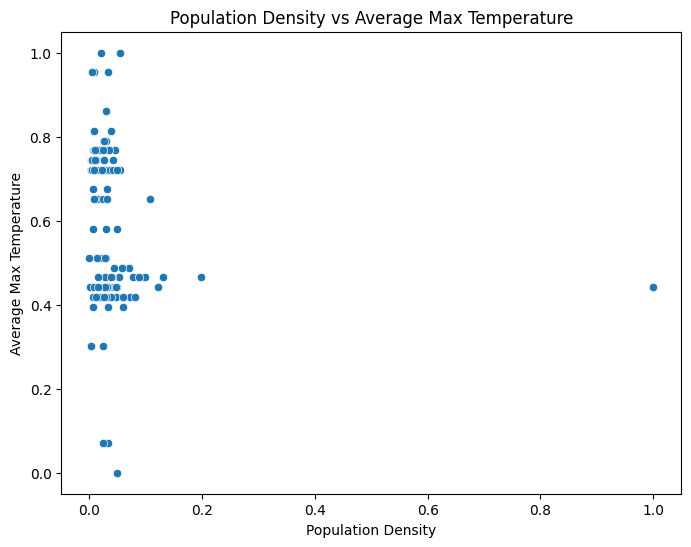

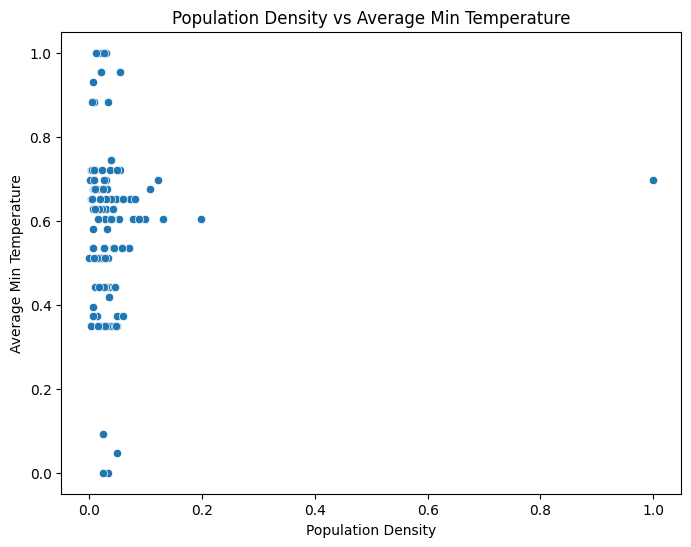

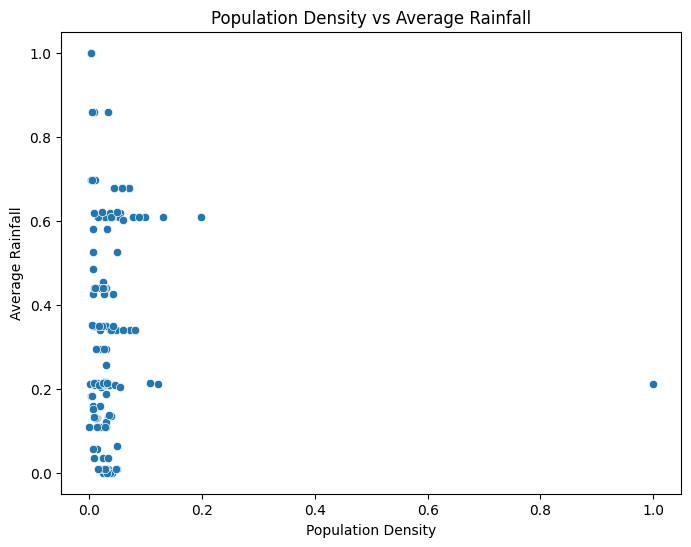

In [187]:
# Scatter plot of PDensity vs AV_Tmax
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PDensity', y='AV_Tmax', data=df)
plt.title('Population Density vs Average Max Temperature')
plt.xlabel('Population Density')
plt.ylabel('Average Max Temperature')
plt.show()

# Scatter plot of PDensity vs AV_Tmin
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PDensity', y='AV_Tmin', data=df)
plt.title('Population Density vs Average Min Temperature')
plt.xlabel('Population Density')
plt.ylabel('Average Min Temperature')
plt.show()

# Scatter plot of PDensity vs AV_Rfall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PDensity', y='AV_Rfall', data=df)
plt.title('Population Density vs Average Rainfall')
plt.xlabel('Population Density')
plt.ylabel('Average Rainfall')
plt.show()


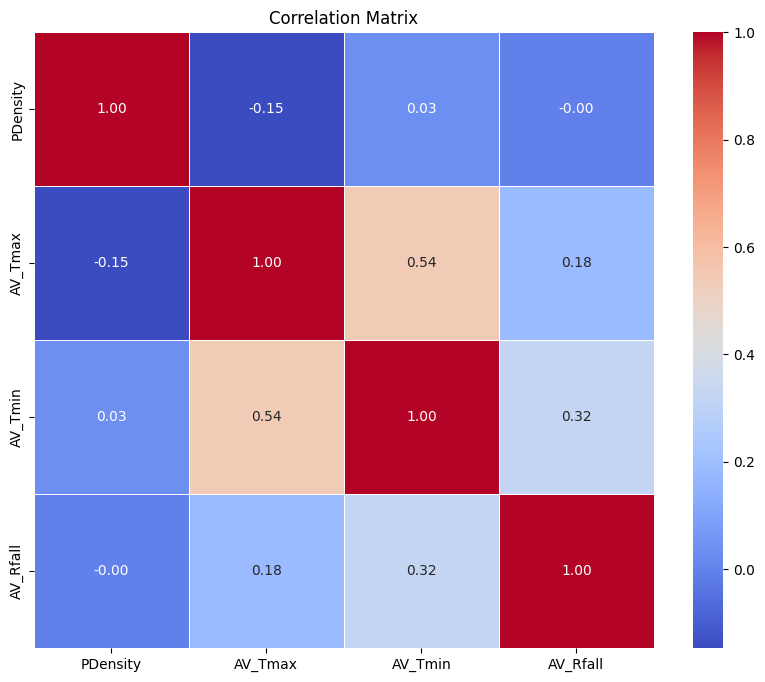

In [188]:
# Compute the correlation matrix
correlation_matrix = df[['PDensity', 'AV_Tmax', 'AV_Tmin', 'AV_Rfall']].corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


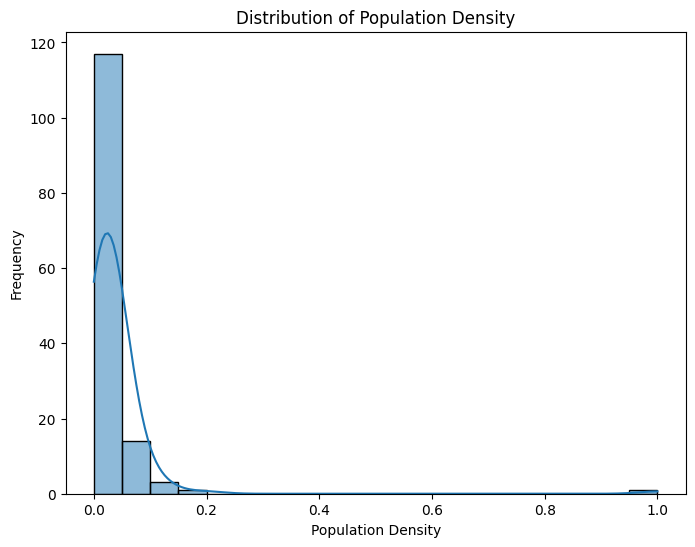

In [189]:
# Distribution plot of population density (PDensity)
plt.figure(figsize=(8, 6))
sns.histplot(df['PDensity'], bins=20, kde=True)
plt.title('Distribution of Population Density')
plt.xlabel('Population Density')
plt.ylabel('Frequency')
plt.show()


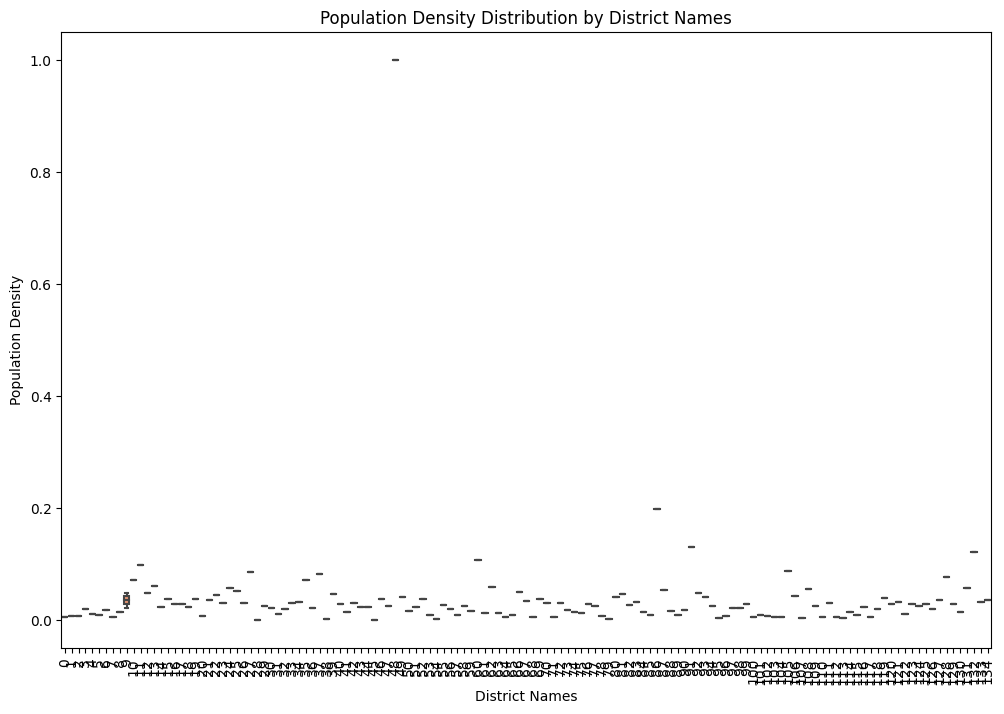

In [190]:
# Box plot of population density (PDensity) by district names (dname2019)
plt.figure(figsize=(12, 8))
sns.boxplot(x='dname2019', y='PDensity', data=df)
plt.title('Population Density Distribution by District Names')
plt.xlabel('District Names')
plt.ylabel('Population Density')
plt.xticks(rotation=90)
plt.show()


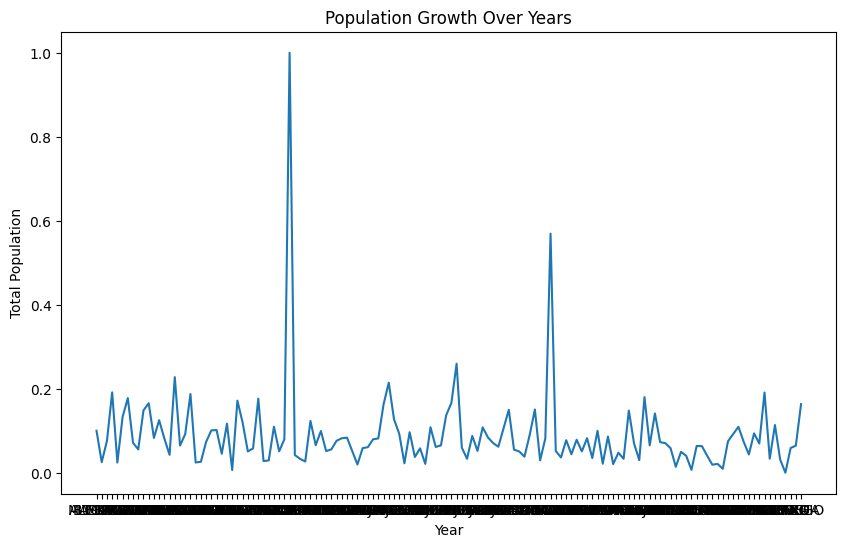

In [191]:
# Time series plot of population growth (total2020) over the years
plt.figure(figsize=(10, 6))
sns.lineplot(x=df['2020'], y=df['total2020'])
plt.title('Population Growth Over Years')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.show()


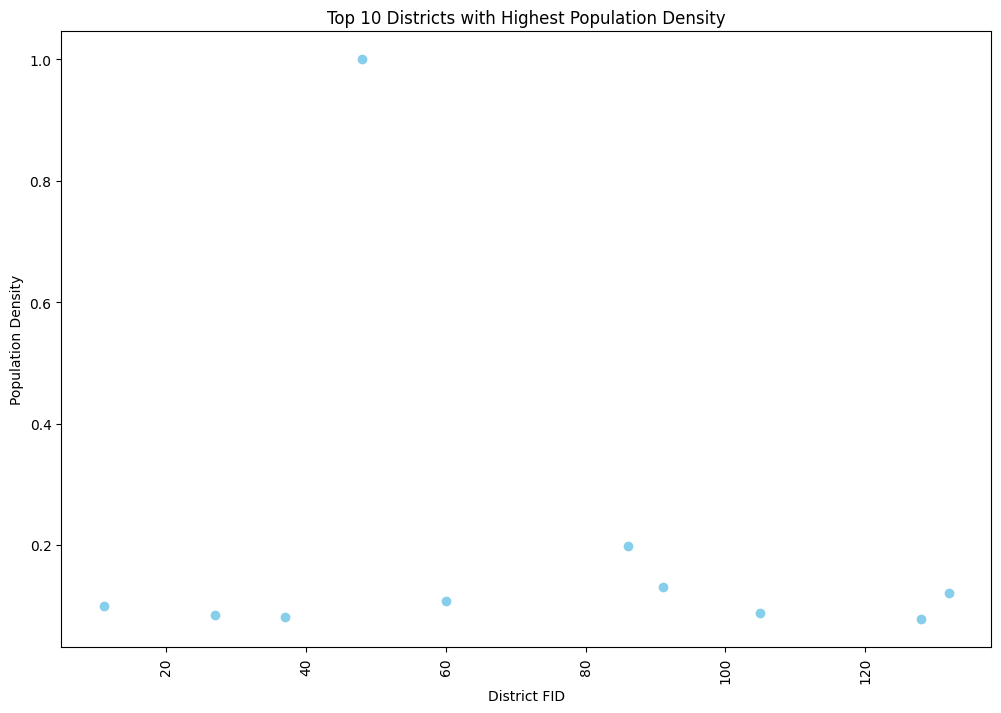

In [192]:
# Sort the DataFrame by population density (descending order)
df_sorted_by_density = df.sort_values('PDensity', ascending=False)

# Select the top 10 districts with the highest population density
top_10_high_density = df_sorted_by_density.head(10)

# Plotting the top 10 districts with the highest population density
plt.figure(figsize=(12, 8))
plt.scatter(top_10_high_density['dname2019'], top_10_high_density['PDensity'], color='skyblue')
plt.xlabel('District FID')
plt.ylabel('Population Density')
plt.title('Top 10 Districts with Highest Population Density')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()


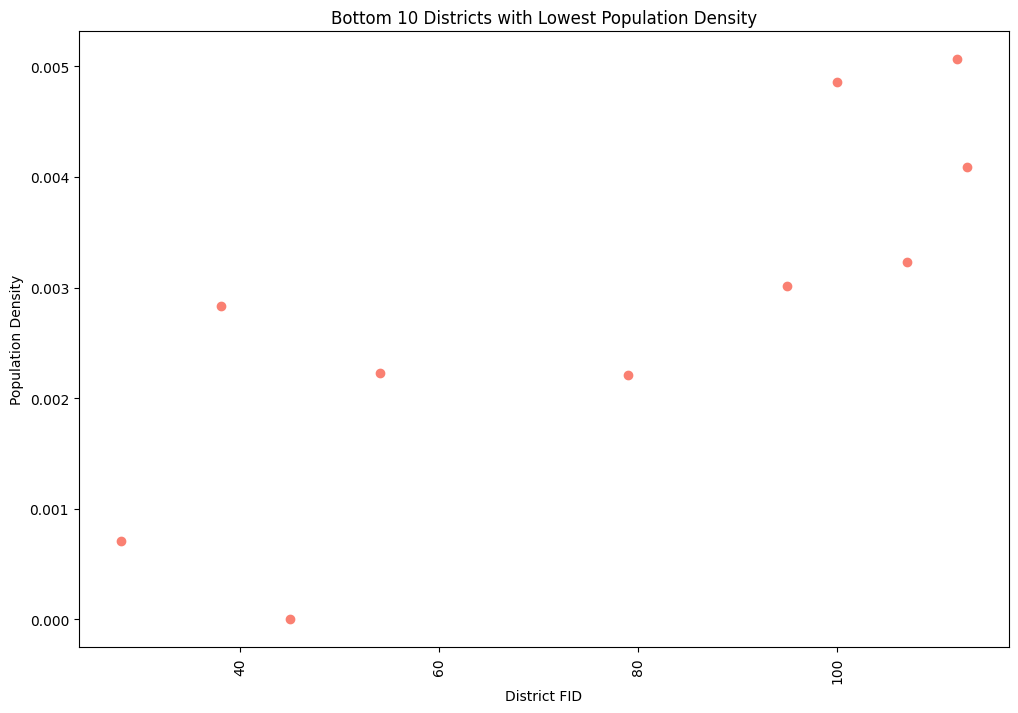

In [193]:
# Select the bottom 10 districts with the lowest population density
bottom_10_low_density = df_sorted_by_density.tail(10)

# Plotting the bottom 10 districts with the lowest population density
plt.figure(figsize=(12, 8))
plt.scatter(bottom_10_low_density['dname2019'], bottom_10_low_density['PDensity'], color='salmon')
plt.xlabel('District FID')
plt.ylabel('Population Density')
plt.title('Bottom 10 Districts with Lowest Population Density')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()
